In [ ]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/kaggle/140k-real-and-fake-faces.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

In [2]:
tf.keras.backend.clear_session() #clean session

In [ ]:
main_path = '/content/real_vs_fake/real-vs-fake/'

train_dir = os.path.join(main_path, 'train')
valid_dir = os.path.join(main_path, 'valid')
test_dir = os.path.join(main_path, 'test')

In [ ]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['real', 'fake']
Valid_dir Subfolders:  ['real', 'fake']
Test_dir Subfolders:  ['real', 'fake']


In [ ]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [ ]:
images_df = pd.DataFrame(images_df)

In [ ]:
images_df

,folder,image_path,label
0,train,/content/real_vs_fake/real-vs-fake//train/real...,real
1,train,/content/real_vs_fake/real-vs-fake//train/real...,real
2,train,/content/real_vs_fake/real-vs-fake//train/real...,real
3,train,/content/real_vs_fake/real-vs-fake//train/real...,real
4,train,/content/real_vs_fake/real-vs-fake//train/real...,real
...,...,...,...
139995,test,/content/real_vs_fake/real-vs-fake//test/fake/...,fake
139996,test,/content/real_vs_fake/real-vs-fake//test/fake/...,fake
139997,test,/content/real_vs_fake/real-vs-fake//test/fake/...,fake
139998,test,/content/real_vs_fake/real-vs-fake//test/fake/...,fake


In [ ]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [ ]:
real_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [ ]:
fake_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [ ]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

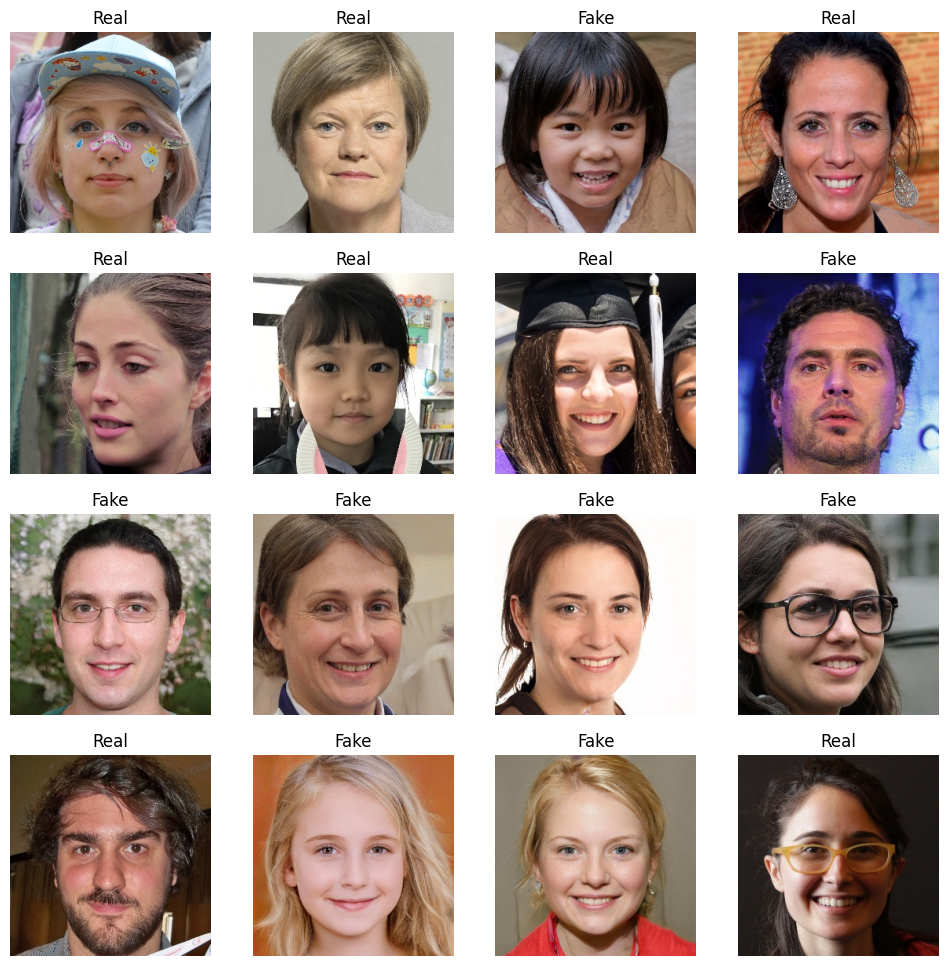

In [ ]:
img,lbl = next(train_ds)
plot_images(img,lbl)

In [ ]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.8196079  0.8705883  0.90196085]
  [0.7490196  0.7803922  0.79215693]
  [0.65882355 0.64705884 0.61960787]
  ...
  [0.9960785  0.91372555 0.79215693]
  [0.98823535 0.91372555 0.7960785 ]
  [0.98823535 0.91372555 0.7960785 ]]

 [[0.8235295  0.8862746  0.93725497]
  [0.8352942  0.8862746  0.9176471 ]
  [0.79215693 0.81568635 0.8078432 ]
  ...
  [0.9921569  0.909804   0.78823537]
  [0.9843138  0.909804   0.79215693]
  [0.9843138  0.909804   0.79215693]]

 [[0.81568635 0.8980393  0.9803922 ]
  [0.8000001  0.882353   0.9490197 ]
  [0.8078432  0.8980393  0.9215687 ]
  ...
  [0.9960785  0.91372555 0.79215693]
  [0.9960785  0.91372555 0.8000001 ]
  [0.9921569  0.909804   0.7960785 ]]

 ...

 [[0.13725491 0.08235294 0.03921569]
  [0.1764706  0.07058824 0.03529412]
  [0.24313727 0.04705883 0.00392157]
  ...
  [0.10196079 0.02745098 0.00392157]
  [0.20784315 0.09803922 0.08235294]
  [0.28627452 0.16470589 0.14509805]]

 [[0.14509805 0.03529412 0.01960784]
  [0.21176472 0.05882353 0.0

In [ ]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [ ]:
train_ds.class_indices

{'fake': 0, 'real': 1}

In [3]:
input_shape = (256, 256, 3) #define the input shape of our data

In [4]:
#create the model's architecture and compile it
def get_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    densenet = tf.keras.applications.DenseNet121( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(densenet.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(densenet.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [5]:
model_ft = get_model(input_shape)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
checkpoint_filepath = "/content/drive/My Drive/model/model_cp.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [ ]:
history_ft = model_ft.fit(train_ds,
                       epochs = 10,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/10
1563/1563 [==============================] - 1490s 917ms/step - loss: 0.1283 - accuracy: 0.9491 - val_loss: 0.1490 - val_accuracy: 0.9419 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - 1417s 906ms/step - loss: 0.0515 - accuracy: 0.9811 - val_loss: 0.2516 - val_accuracy: 0.9031 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - 1406s 899ms/step - loss: 0.0406 - accuracy: 0.9850 - val_loss: 4.2505 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 4/10
1563/1563 [==============================] - 1406s 899ms/step - loss: 0.0327 - accuracy: 0.9881 - val_loss: 0.0684 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 5/10
1563/1563 [==============================] - 1400s 896ms/step - loss: 0.0294 - accuracy: 0.9889 - val_loss: 0.0685 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 6/10
1563/1563 [==============================] - 1410s 902ms/step - loss: 0.0260 - accuracy: 0.9905 - val_loss: 0.1664 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 7/10
1563/1563 [======

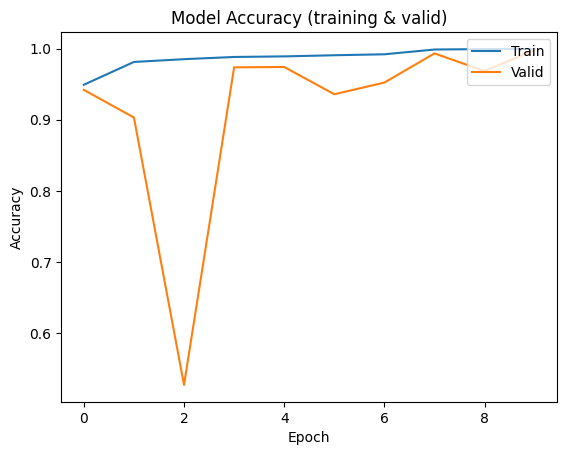

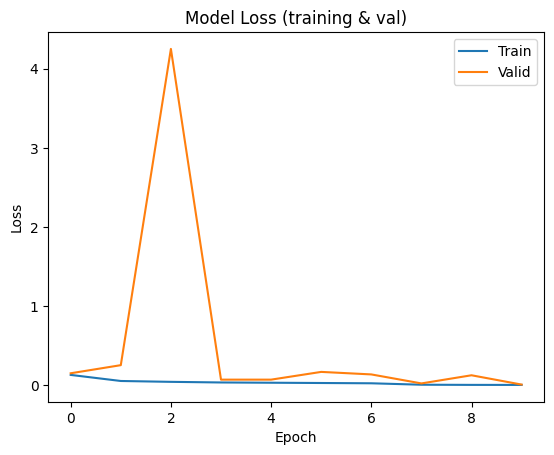

In [ ]:
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft.history['loss'])
plt.plot(history_ft.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_ft.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 75s 240ms/step - loss: 0.0052 - accuracy: 0.9983
Test Loss: 0.005187706556171179
Test Accuracy: 0.9983000159263611


In [6]:
model = get_model(input_shape)

# Restore the weights
model.load_weights('/content/drive/MyDrive/model/model_cp.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 78s 234ms/step - loss: 0.0052 - accuracy: 0.9983
Test Loss: 0.005187706556171179
Test Accuracy: 0.9983000159263611


1/1 [==============================] - 1s 519ms/step


Text(0.5, 1.0, 'This image is 0.00% Fake and 100.00% Real.')

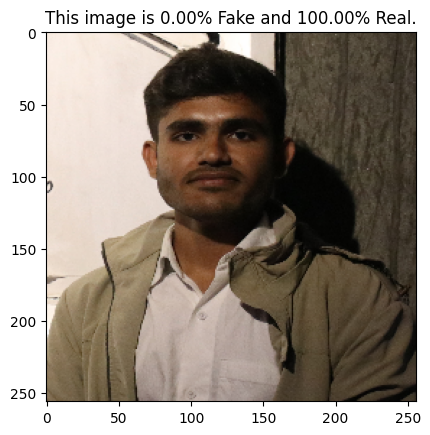

In [10]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/real_images/siddhant.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")

1/1 [==============================] - 0s 350ms/step


Text(0.5, 1.0, 'This image is 91.03% Fake and 8.97% Real.')

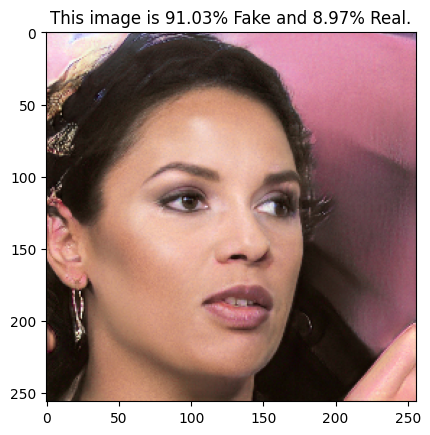

In [ ]:
test_image = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/test/fake/000225.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)

#fake example
test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")

In [ ]:
|# Assuming you have defined your model as 'model'
predicted_labels = model.predict(test_ds)

313/313 [==============================] - 75s 235ms/step


In [ ]:
true_labels = test_ds.classes

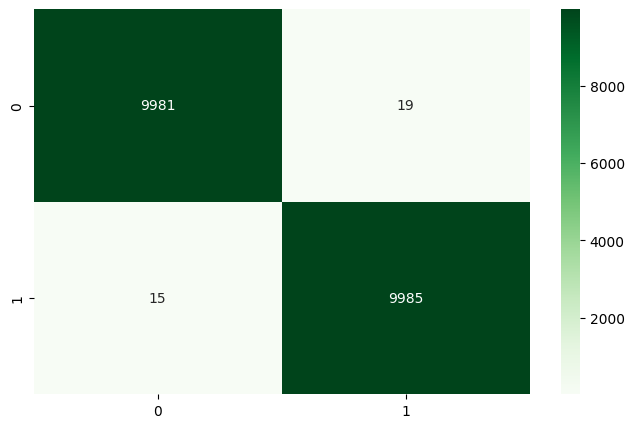

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

In [ ]:
metrics.accuracy_score(true_labels, predicted_labels.round())

0.9983

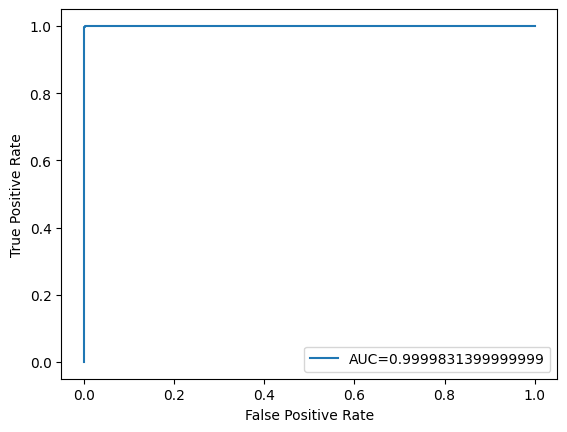

In [ ]:
fpr, tpr, _ = metrics.roc_curve(true_labels,  predicted_labels)
auc = metrics.roc_auc_score(true_labels, predicted_labels)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()